In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Data Loading

In [4]:
df = pd.read_csv('Retail_Sales_Data.csv')
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
#Data Understanding

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [10]:
df.isna().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [8]:
print("Total sales : {}".format(df["Quantity"].sum()))
print("Total profit : {}".format(df["Total Amount"].sum()))

Total sales : 2514
Total profit : 456000


In [11]:
df.duplicated().sum()

0

In [12]:
# Descriptive Statistics

In [13]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [14]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [15]:
#Mean

In [19]:
a = df['Age'].mean()
b = df['Quantity'].mean()
c = df['Total Amount'].mean()
(a,b,c)

(41.392, 2.514, 456.0)

In [20]:
#Median

In [24]:
aa = df['Age'].median()
bb = df['Quantity'].median()
cc = df['Total Amount'].median()
(aa,bb,cc)

(42.0, 3.0, 135.0)

In [22]:
#Mode

In [25]:
aaa = df['Age'].mode()
bbb = df['Product Category'].mode()
ccc = df['Gender'].mode()

(aaa,bbb,ccc)

(0    43
 1    64
 Name: Age, dtype: int64,
 0    Clothing
 Name: Product Category, dtype: object,
 0    Female
 Name: Gender, dtype: object)

In [28]:
#Visualization

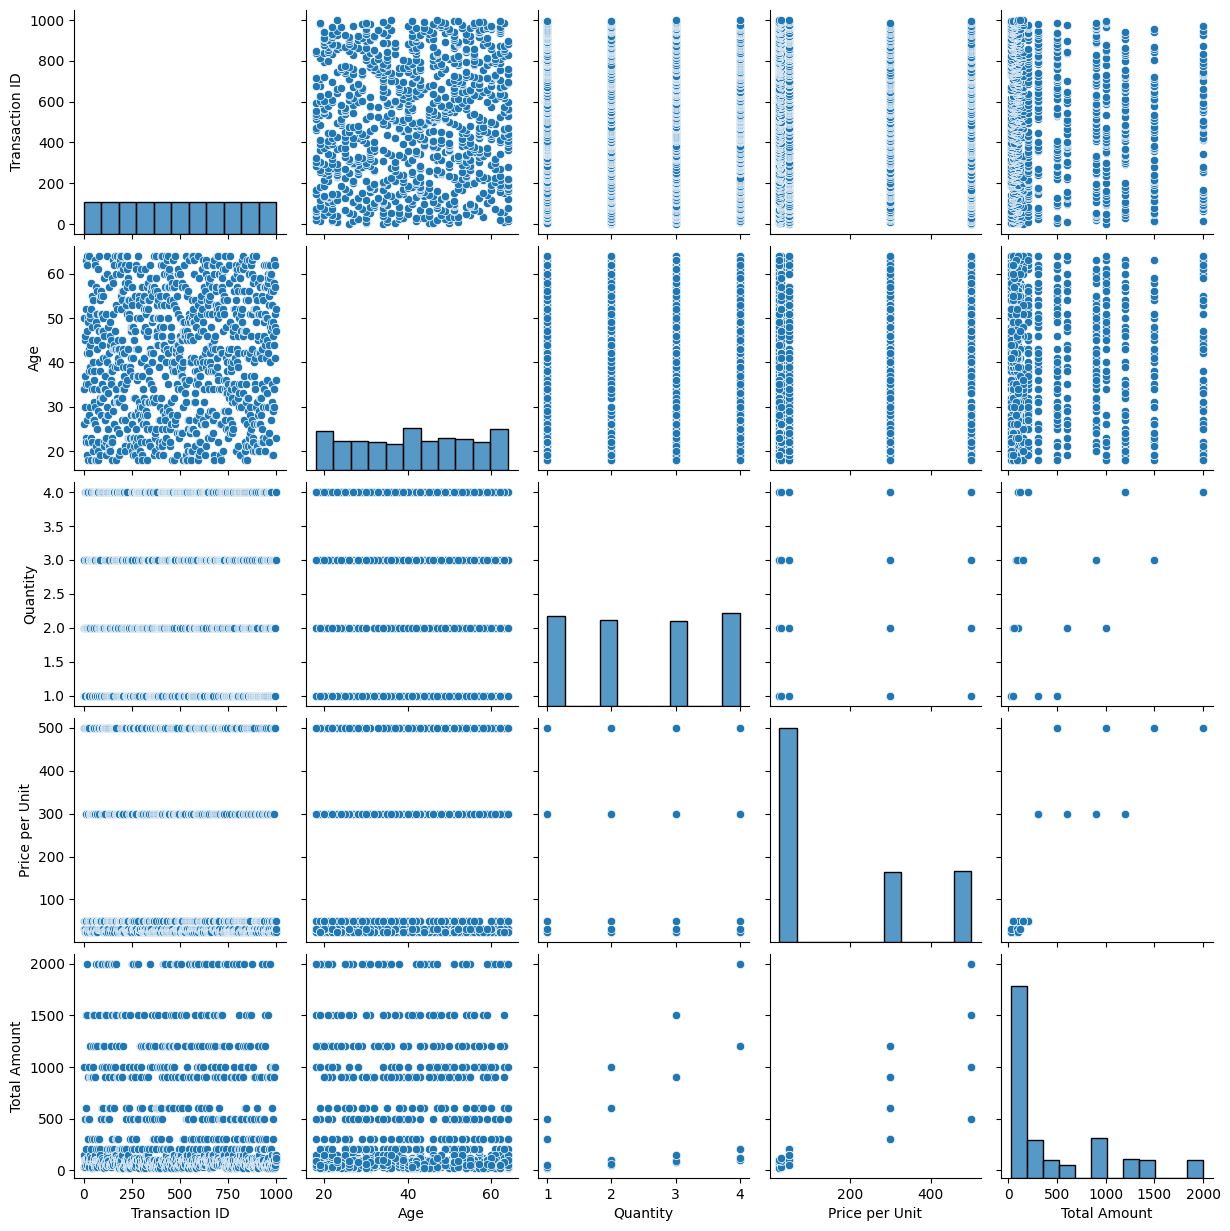

In [29]:
sns.pairplot(df)

In [30]:
#Product Analysis

In [31]:
df["Product Category"].value_counts()

,count
Product Category,
Clothing,351
Electronics,342
Beauty,307


Text(0.5, 1.0, 'Product Category Analysis')

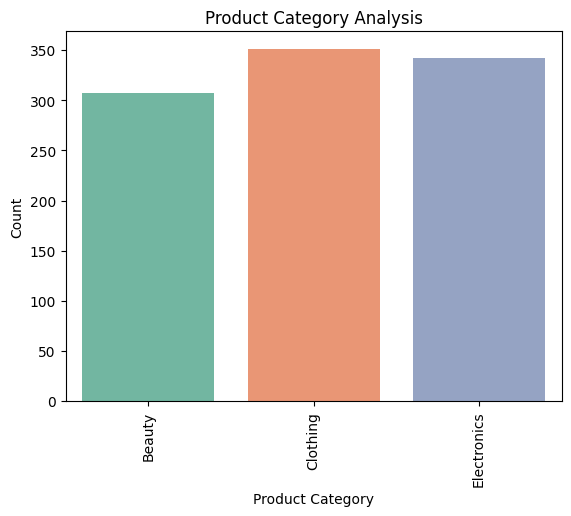

In [34]:
sns.countplot(x=df["Product Category"], palette='Set2')
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title("Product Category Analysis")

In [35]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [36]:
#Total Amount Product Category Wise

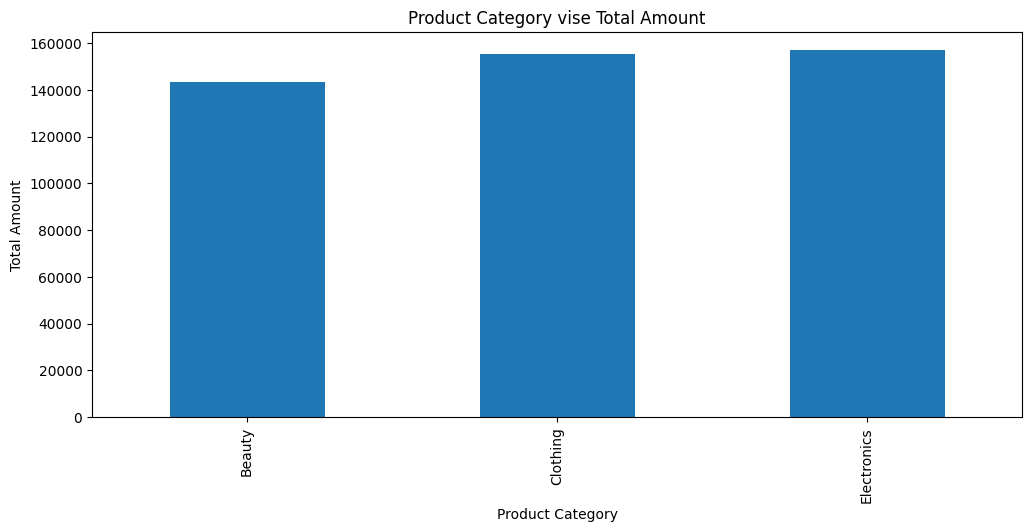

In [58]:
p = df.groupby("Product Category")["Total Amount"].sum()
p.plot(kind="bar", figsize=(12,5))
plt.title("Product Category vise Total Amount")
plt.xlabel("Product Category")
plt.ylabel("Total Amount")
plt.show()

In [41]:
#Customer Age Distribution

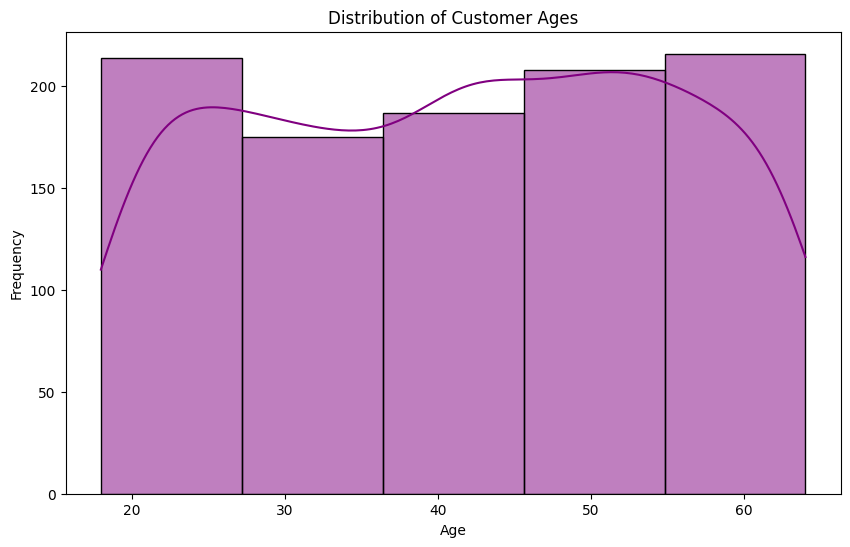

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=5, kde=True, color='purple')
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [44]:
#Gender Distribution

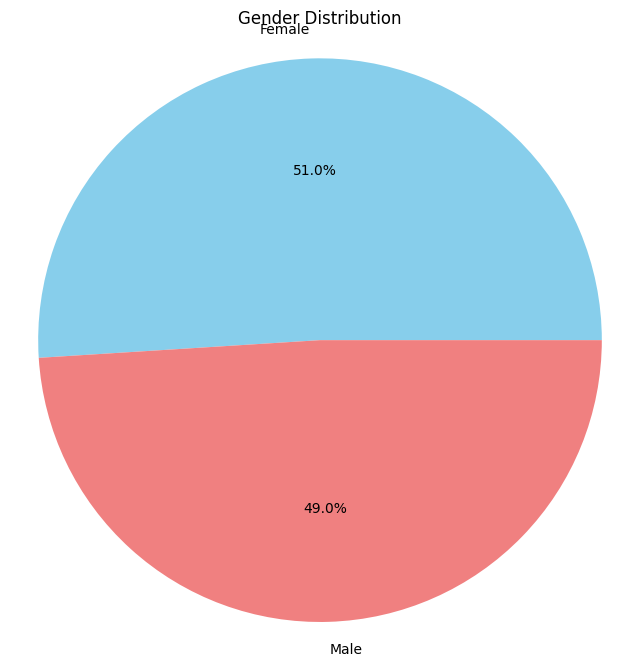

In [45]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

In [46]:
#Total Amount by Product Category

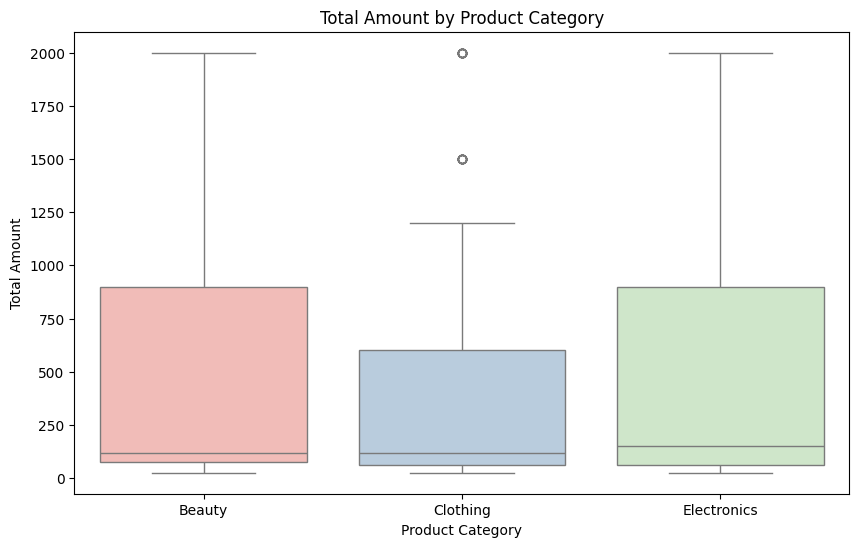

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product Category', y='Total Amount', data=df, palette='Pastel1')
plt.title('Total Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.show()

In [50]:
#Quantity by Product Category

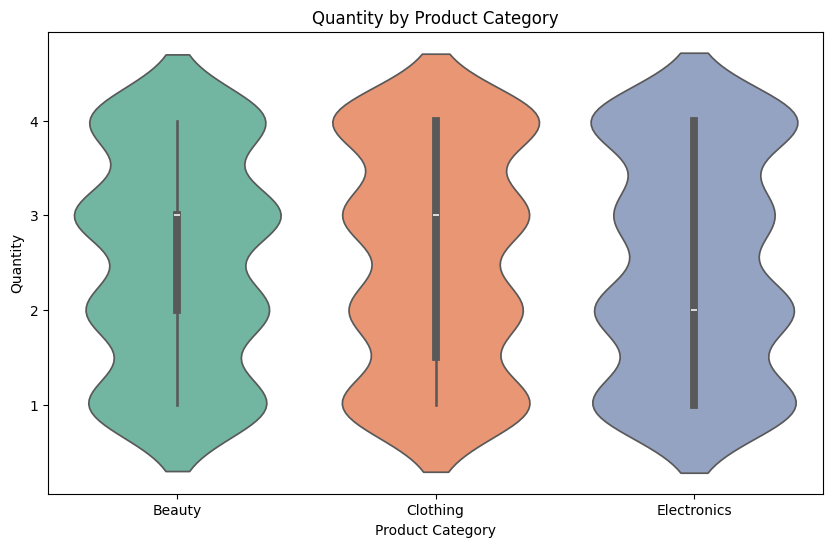

In [51]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Product Category', y='Quantity', data=df, palette='Set2')
plt.title('Quantity by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Quantity')
plt.show()

In [52]:
# Pair Plot of Numerical Data

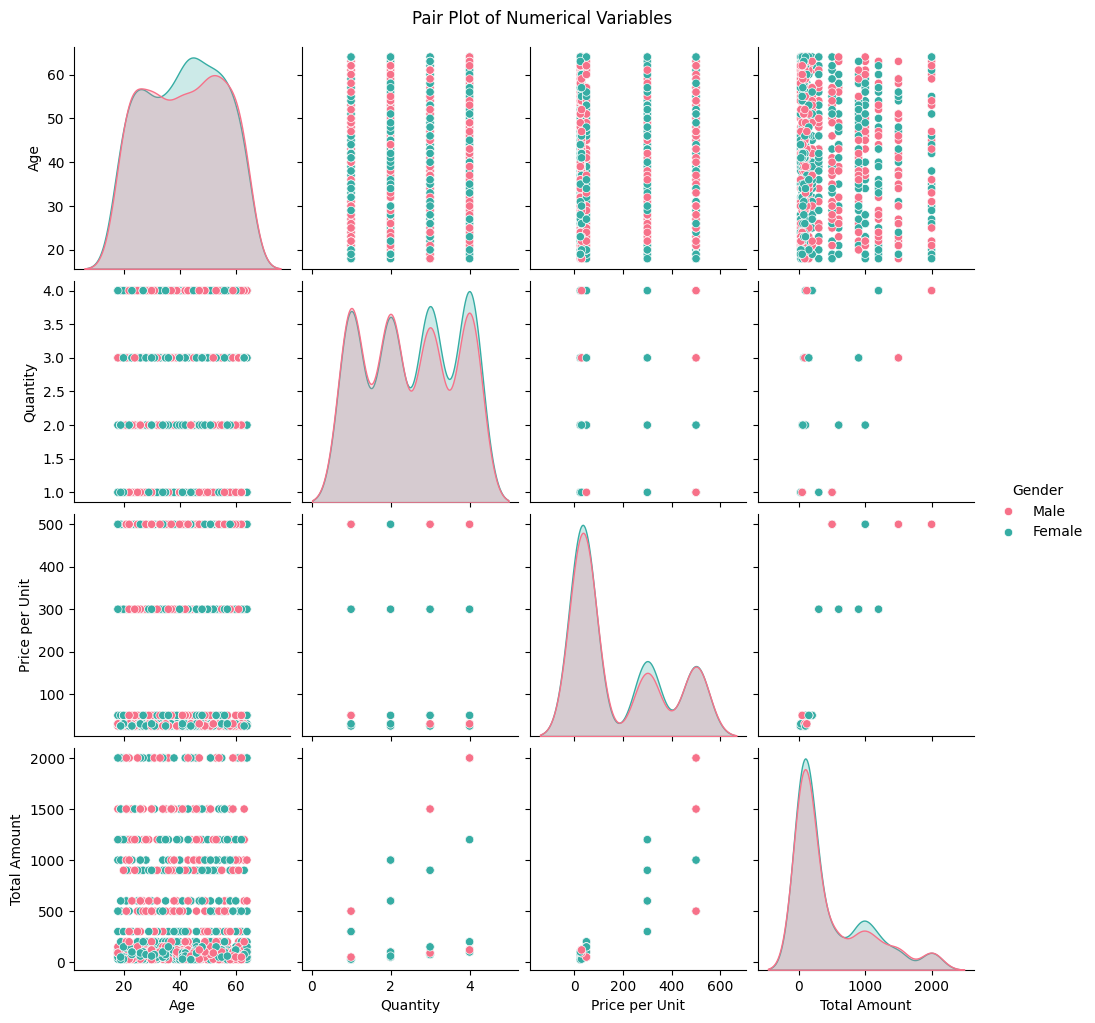

In [53]:
sns.pairplot(df, vars=['Age', 'Quantity', 'Price per Unit', 'Total Amount'], hue='Gender', palette='husl')
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()